In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from pathlib import Path

data_dir = Path("/content/drive/MyDrive/ADA_Judiciary")

In [35]:
acts_part_1 = pd.read_csv(data_dir / "acts_sections" / "part_1.csv")
acts_split_csv = pd.read_csv(data_dir / "acts_sections" / "split_csv.ps1")
judges = pd.read_csv(data_dir / "judges" / "judges.csv")
act_key = pd.read_csv(data_dir / "keys" / "act_key.csv")
court_key = pd.read_csv(data_dir / "keys" / "cases_court_key.csv")
district_key = pd.read_csv(data_dir / "keys" / "cases_district_key.csv")
judge_case_merge_key = pd.read_csv(data_dir / "keys" / "judge_case_merge_key.csv")

In [5]:
print(len(judge_case_merge_key))
judge_case_merge_key.head()

12901146


,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id
0,01-01-01-201900000022018,5.0,5.0
1,01-01-01-201900000032017,5.0,5.0
2,01-01-01-201900000032018,94.0,94.0
3,01-01-01-201900000042016,3.0,5.0
4,01-01-01-201900000042018,156.0,156.0


In [ ]:
print(len(acts_part_1))
acts_part_1.head()

1878


,ddl_case_id,act,section,bailable_ipc,number_sections_ipc,criminal
0,06-03-02-210100004042014,17353,NaN,NaN,1.0,1
1,23-34-01-229900001012019,4759,NaN,NaN,NaN,1
2,13-18-03-204000030972016,17353,NaN,NaN,1.0,1
3,23-28-01-220102000232016,4759,NaN,NaN,NaN,1
4,01-35-05-203007002652012,17353,NaN,NaN,1.0,1


In [ ]:
print(len(acts_split_csv))
acts_split_csv.head()

17


,"$infile = ""acts_sections.csv"""
0,"$prefix = ""part_"""
1,$maxLines = 500000
2,$header = Get-Content $infile -TotalCount 1
3,$i = 1
4,$lineCount = 0


In [ ]:
print(len(judges))
judges.head(20)

98478


,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
5,6,1,1,1,chief judicial magistrate,1 female,09-07-2018,NaN
6,7,1,1,1,civil judge junior division,0 nonfemale,01-06-2011,09-06-2013
7,8,1,1,1,civil judge junior division,0 nonfemale,06-06-2011,08-06-2014
8,9,1,1,1,civil judge junior division,0 nonfemale,11-06-2012,31-05-2015
9,10,1,1,1,civil judge junior division,0 nonfemale,29-08-2013,08-06-2014


In [6]:
for col in ['judge_position']:
    print(col, judges[col].unique())

judge_position ['chief judicial magistrate' 'civil judge junior division'
 'civil judge senior division' 'district and sessions court'
 'criminal cases' 'civil judge' 'judicial magistrate court' 'civil court'
 'motor accidents claims tribunal' 'railway ner' 'small cause court'
 'gram nyayalaya' 'additional district judge' 'juvenile court'
 'additional district and sessions court' 'jmfc' 'commercial court'
 'district and additional sessions court'
 'additional metropolitan magistrate' 'chief metropolitan magistrate'
 'junior division' 'cantonment court' 'municipal court'
 'city district and sessions court' 'fast track court' 'industrial court'
 'labour court' 'cooperative court' 'family court' 'school tribunal'
 '2-district and sessions court' 'jcj court, puttaparthy'
 '11-additional district and sessions court'
 '6-additional civil judge junior division' 'jcj courts, satyavedu'
 'principal civil judge junior division' '3-jmfc'
 'additional civil judge junior division'
 'principal distr

In [36]:
def clean_judge_position(pos):
    pos = str(pos).lower()

    if any(x in pos for x in ['magistrate', 'jmfc', 'sub-judge', 'civil court', 'small cause court', 'taluka court', 'sub court', 'munsiff', 'munsif']):
        return 'magistrate'
    elif any(x in pos for x in ['civil judge', 'district judge', 'additional district', 'principal civil', 'junior division', 'senior division']):
        return 'district_civil_judge'
    elif any(x in pos for x in ['sessions court', 'district and sessions', 'additional district and sessions', 'principal district and sessions', 'criminal cases']):
        return 'sessions_court'
    elif any(x in pos for x in ['metropolitan', 'chief metropolitan']):
        return 'metropolitan_court'
    elif 'juvenile' in pos:
        return 'juvenile_court'
    elif 'family' in pos:
        return 'family_court'
    elif any(x in pos for x in ['special court', 'spl court', 'spl judge', 'special judges', 'special excise']):
        return 'special_court'
    elif any(x in pos for x in ['fast track court', 'ftc', 'ftc-1', 'ftc-2', 'ftc i', 'ftc ii', 'ftc judges', 'ftc judges']):
        return 'fast_track_court'
    elif 'motor' in pos or 'accident' in pos or 'mac' in pos:
        return 'motor_accident_court'
    elif any(x in pos for x in ['industrial', 'labour']):
        return 'industrial_labour_court'
    elif 'cooperative' in pos:
        return 'cooperative_court'
    elif 'tribunal' in pos:
        return 'tribunal'
    elif 'cbi court' in pos:
        return 'cbi_court'
    elif 'vacation' in pos:
        return 'vacation'
    else:
        return 'other'

# Apply to the judges table
judges['judge_category'] = judges['judge_position'].apply(clean_judge_position)


In [37]:
for col in ['judge_category']:
    print(col, judges[col].unique())

# Count of each judge category
category_counts = judges['judge_category'].value_counts()

print(category_counts)

judge_category ['magistrate' 'district_civil_judge' 'sessions_court'
 'motor_accident_court' 'other' 'juvenile_court' 'fast_track_court'
 'industrial_labour_court' 'cooperative_court' 'family_court' 'tribunal'
 'cbi_court' 'vacation' 'special_court']
judge_category
magistrate                 34754
district_civil_judge       31098
sessions_court             25758
other                       2299
family_court                1852
industrial_labour_court      738
vacation                     659
motor_accident_court         514
fast_track_court             261
special_court                212
juvenile_court               113
cbi_court                    110
tribunal                      59
cooperative_court             51
Name: count, dtype: int64


In [50]:
judges[judges['judge_category'] == 'magistrate']['judge_position'].value_counts()

,count
judge_position,
chief judicial magistrate,14373
civil court,5416
judicial magistrate court,3578
additional chief judicial magistrate,2195
chief metropolitan magistrate,1647
...,...
16-additional chief judicial magistrate,1
13-additional chief judicial magistrate,1
2-metropolitan magistrate court,1


In [39]:
# Merge filing judge category
judge_case_merge_key = judge_case_merge_key.merge(
    judges[['ddl_judge_id', 'judge_category']],
    how='left',
    left_on='ddl_filing_judge_id',
    right_on='ddl_judge_id'
).rename(columns={'judge_category': 'filing_judge_category'})

# Merge decision judge category
judge_case_merge_key = judge_case_merge_key.merge(
    judges[['ddl_judge_id', 'judge_category']],
    how='left',
    left_on='ddl_decision_judge_id',
    right_on='ddl_judge_id'
).rename(columns={'judge_category': 'decision_judge_category'})

# Drop redundant columns
judge_case_merge_key = judge_case_merge_key.drop(columns=['ddl_judge_id_x', 'ddl_judge_id_y'])

# Check the result
judge_case_merge_key.head()

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id,filing_judge_category,decision_judge_category
0,01-01-01-201900000022018,5.0,5.0,magistrate,magistrate
1,01-01-01-201900000032017,5.0,5.0,magistrate,magistrate
2,01-01-01-201900000032018,94.0,94.0,magistrate,magistrate
3,01-01-01-201900000042016,3.0,5.0,magistrate,magistrate
4,01-01-01-201900000042018,156.0,156.0,magistrate,magistrate


In [40]:
# Count of cases by filing and decision judge categories
category_combinations = judge_case_merge_key.groupby(
    ['filing_judge_category', 'decision_judge_category']
).size().reset_index(name='case_count')

# Sort by the highest number of cases
category_combinations = category_combinations.sort_values(by='case_count', ascending=False)

# Show top 20 combinations
print(category_combinations.head(30))


      filing_judge_category  decision_judge_category  case_count
7                magistrate               magistrate     5075910
10           sessions_court           sessions_court     3872921
2      district_civil_judge     district_civil_judge      942935
3              family_court             family_court      223616
9                     other                    other      198108
6            juvenile_court           juvenile_court        6087
4          fast_track_court         fast_track_court        2610
8      motor_accident_court     motor_accident_court        1752
0                 cbi_court                cbi_court         563
5   industrial_labour_court  industrial_labour_court         554
12                 tribunal                 tribunal         444
11            special_court            special_court         233
13                 vacation                 vacation           2
1         cooperative_court        cooperative_court           1


In [48]:
judge_case_with_filing = judge_case_merge_key.merge(
    judges[['ddl_judge_id', 'judge_position', 'judge_category']],
    how='left',
    left_on='ddl_filing_judge_id',
    right_on='ddl_judge_id'
).rename(columns={
    'judge_position': 'filing_judge_position',
    'judge_category': 'filing_judge_category'
}).drop(columns=['ddl_judge_id'])

In [49]:
judge_case_with_filing.head()

,ddl_case_id,ddl_filing_judge_id,ddl_decision_judge_id,filing_judge_category,decision_judge_category,filing_judge_position,filing_judge_category
0,01-01-01-201900000022018,5.0,5.0,magistrate,magistrate,chief judicial magistrate,magistrate
1,01-01-01-201900000032017,5.0,5.0,magistrate,magistrate,chief judicial magistrate,magistrate
2,01-01-01-201900000032018,94.0,94.0,magistrate,magistrate,chief judicial magistrate,magistrate
3,01-01-01-201900000042016,3.0,5.0,magistrate,magistrate,chief judicial magistrate,magistrate
4,01-01-01-201900000042018,156.0,156.0,magistrate,magistrate,chief judicial magistrate,magistrate


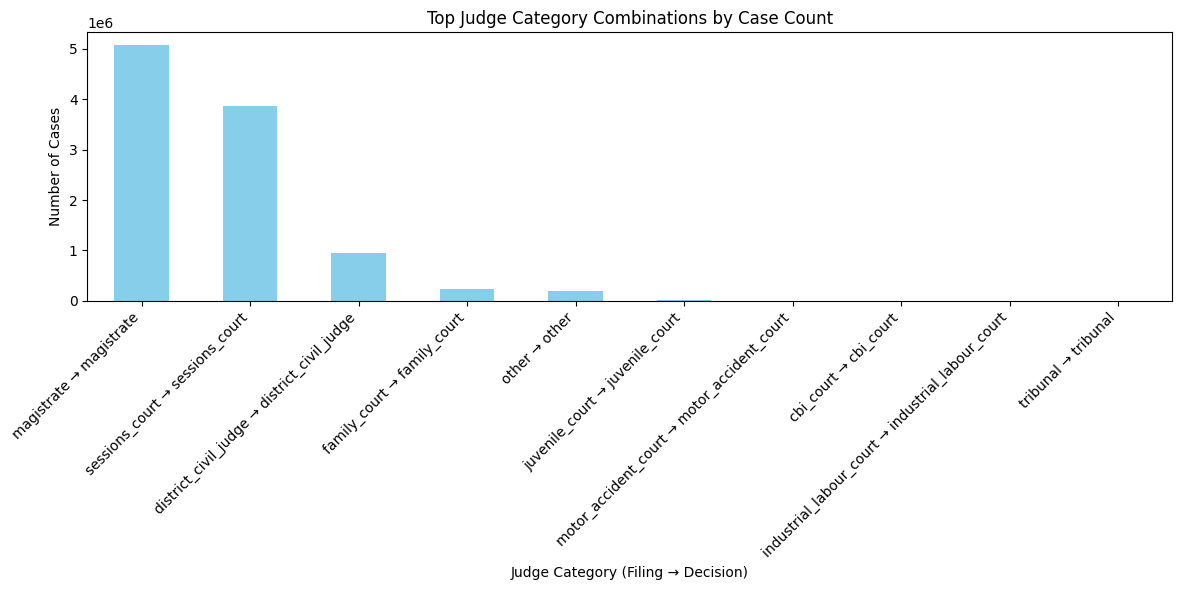

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame
data = {
    'filing_judge_category': ['magistrate','sessions_court','district_civil_judge','family_court','other',
                              'juvenile_court','motor_accident_court','cbi_court','industrial_labour_court',
                              'tribunal','special_court','cooperative_court'],
    'decision_judge_category': ['magistrate','sessions_court','district_civil_judge','family_court','other',
                                'juvenile_court','motor_accident_court','cbi_court','industrial_labour_court',
                                'tribunal','special_court','cooperative_court'],
    'case_count': [5075910, 3872921, 942935, 223616, 200720, 6087, 1752, 563, 554, 444, 233, 1]
}

category_combinations = pd.DataFrame(data)

# Create a label combining filing and decision categories
category_combinations['category_pair'] = (
    category_combinations['filing_judge_category'] + ' → ' +
    category_combinations['decision_judge_category']
)

# Plot top 10 combinations
category_combinations.nlargest(10, 'case_count').plot(
    x='category_pair',
    y='case_count',
    kind='bar',
    figsize=(12,6),
    legend=False,
    color='skyblue'
)
plt.title('Top Judge Category Combinations by Case Count')
plt.xlabel('Judge Category (Filing → Decision)')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


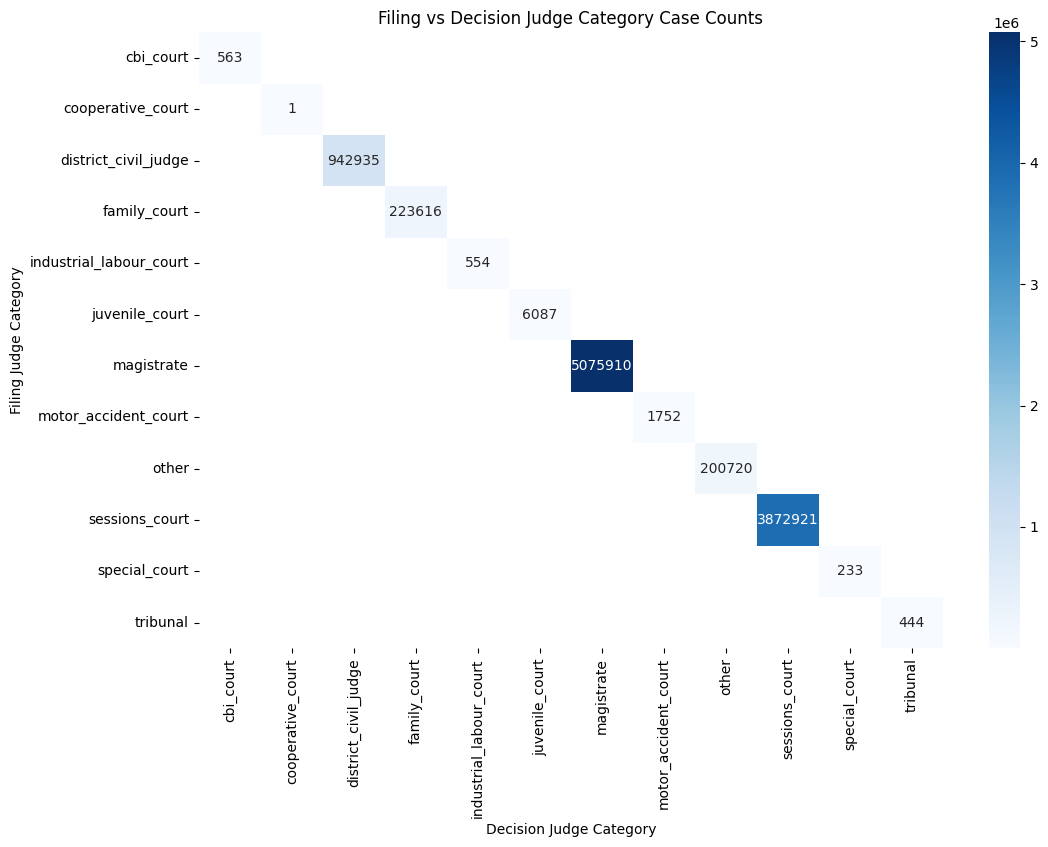

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataframe
data = {
    'filing_judge_category': ['magistrate','sessions_court','district_civil_judge','family_court','other',
                              'juvenile_court','motor_accident_court','cbi_court','industrial_labour_court',
                              'tribunal','special_court','cooperative_court'],
    'decision_judge_category': ['magistrate','sessions_court','district_civil_judge','family_court','other',
                                'juvenile_court','motor_accident_court','cbi_court','industrial_labour_court',
                                'tribunal','special_court','cooperative_court'],
    'case_count': [5075910, 3872921, 942935, 223616, 200720, 6087, 1752, 563, 554, 444, 233, 1]
}

df = pd.DataFrame(data)

# Pivot the table for heatmap
heatmap_data = df.pivot(index='filing_judge_category', columns='decision_judge_category', values='case_count')

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Blues')
plt.title("Filing vs Decision Judge Category Case Counts")
plt.ylabel("Filing Judge Category")
plt.xlabel("Decision Judge Category")
plt.show()


In [ ]:
print(len(act_key))
act_key.head()

29857


,act_s,count,act
0,NaN,11282.0,NaN
1,',11160.0,1.0
2,'',20887.0,2.0
3,'Tamil Nadu City Police Act,371.0,3.0
4,"(BOMBAY) NATIONAL PARK ACT, 1950",2.0,4.0


In [ ]:
print(len(court_key))
court_key.head(20)

59428


,year,state_code,state_name,district_name,dist_code,court_no,court_name
0,2010,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,2010,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,2010,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,2010,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,2010,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada
5,2010,1,Maharashtra,Nandurbar,1,6,Civil Court S.D. Shahada
6,2010,1,Maharashtra,Nandurbar,1,7,Additional District And Sessions Court Shahada
7,2010,1,Maharashtra,Nandurbar,1,8,"Civil Court, J.D. and J.M.F.C., Nawapur."
8,2010,1,Maharashtra,Nandurbar,1,9,"Civil Court J.D. and J.M.F.C., Akkalkuwa"
9,2010,1,Maharashtra,Nandurbar,1,10,"C.J.J.D. AND J.M.F.C., DHADGAON/AKRANI"


In [ ]:
print(len(district_key))
district_key.head()

632


,year,state_code,state_name,dist_code,district_name,pc11_state_name,pc11_state_id,pc11_district_name,pc11_district_id
0,2010,2,Andhra Pradesh,7,Kadapa,andhra pradesh,28,NaN,NaN
1,2010,2,Andhra Pradesh,15,Nellore,andhra pradesh,28,NaN,NaN
2,2010,8,Bihar,10,Motihari,bihar,10,NaN,NaN
3,2010,8,Bihar,4,Saran at Chapra,bihar,10,NaN,NaN
4,2010,8,Bihar,28,Bettiah,bihar,10,NaN,NaN


In [ ]:
print(cases.columns)
print(acts_part_1.columns)
print(judges.columns)
print(act_key.columns)
print(court_key.columns)
print(district_key.columns)

Index(['ddl_case_id', 'year', 'state_code', 'dist_code', 'court_no', 'cino',
       'judge_position', 'female_defendant', 'female_petitioner',
       'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name',
       'disp_name', 'date_of_filing', 'date_of_decision', 'date_first_list',
       'date_last_list', 'date_next_list'],
      dtype='object')
Index(['ddl_case_id', 'act', 'section', 'bailable_ipc', 'number_sections_ipc',
       'criminal'],
      dtype='object')
Index(['ddl_judge_id', 'state_code', 'dist_code', 'court_no', 'judge_position',
       'female_judge', 'start_date', 'end_date'],
      dtype='object')
Index(['act_s', 'count', 'act'], dtype='object')
Index(['year', 'state_code', 'state_name', 'district_name', 'dist_code',
       'court_no', 'court_name'],
      dtype='object')
Index(['year', 'state_code', 'state_name', 'dist_code', 'district_name',
       'pc11_state_name', 'pc11_state_id', 'pc11_district_name',
       'pc11_district_id'],
      dtype='object')
